# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

# What is EDA? 
## Exploratory Data Analysis
* Step to take initial data set and get a high level statistical numbers (centralities/dispersions/etc) - Andrew
* Find possible bugs and logical inconsistencies in the data, have to go back to team that put together database - Tara

## Objectives
You will be able to:
* Show mastery of the content covered in this section
* YWBAT Explore data and find correlations
* YWBAT Create visualizations from the data set
* YWBAT slice data based on specific values 
* YWBAT normalization of the data (mean)

# What did we learn?
* The color dictionary scatter plot - Tara, John, Andrew
* The steps to take a high level eda - Andrew
* Scattermatrix - Andrew

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [47]:
# look at nulls
df.info()
# all numbers equal 333 which means there are no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [48]:
df = pd.read_csv("train.csv") # df is very common name a variable (dataframe)
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


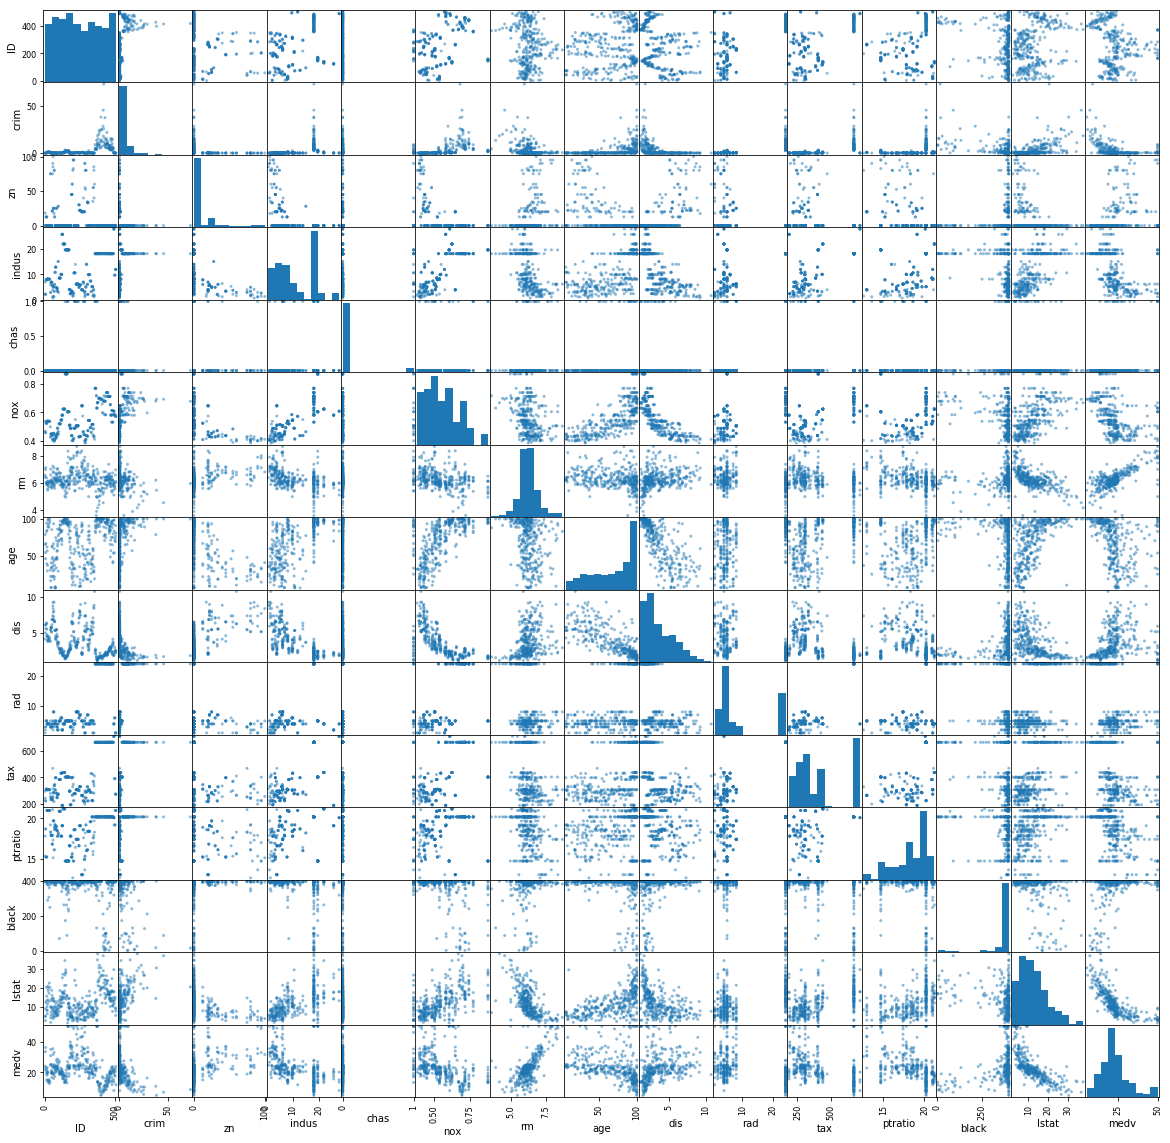

In [49]:
pd.scatter_matrix(df, figsize=(20, 20), density_kwds='kde')
plt.show()

In [14]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


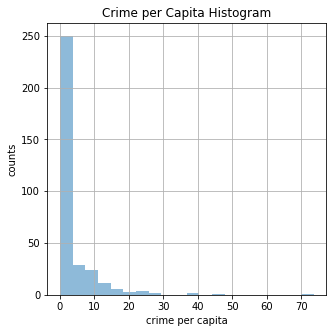

In [51]:
df.crim.plot(kind='hist', bins=20, figsize=(5, 5), alpha=0.5, grid=True)
# alpha affects the transparency of the graph
plt.xlabel("crime per capita")
plt.ylabel("counts")
plt.title("Crime per Capita Histogram")
plt.show()

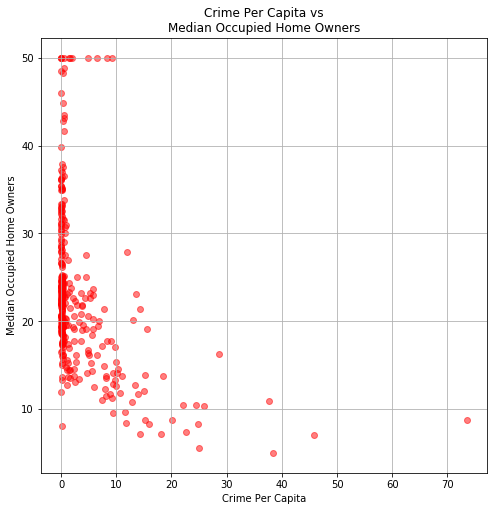

In [52]:
medv = df.medv
crim = df.crim
plt.figure(figsize=(8, 8))
plt.scatter(crim, medv, alpha=0.5, c='r')
plt.grid()
plt.xlabel("Crime Per Capita")
plt.ylabel("Median Occupied Home Owners")
plt.title("Crime Per Capita vs\nMedian Occupied Home Owners")
plt.show()

In [61]:
crime_greater_than_one = df[(df["crim"] > 1.0) & (df["medv"] < 30)]

In [62]:
crime_greater_than_one.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
11,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
15,23,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
18,31,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
19,32,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5


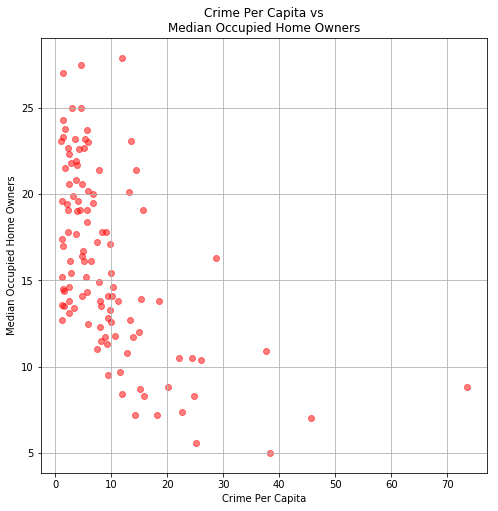

In [63]:
medv = crime_greater_than_one.medv
crim = crime_greater_than_one.crim
plt.figure(figsize=(8, 8))
plt.scatter(crim, medv, alpha=0.5, c='r')
plt.grid()
plt.xlabel("Crime Per Capita")
plt.ylabel("Median Occupied Home Owners")
plt.title("Crime Per Capita vs\nMedian Occupied Home Owners")
plt.show()

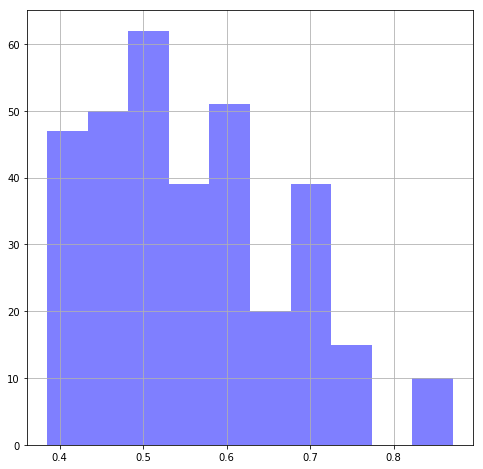

In [65]:
plt.figure(figsize=(8, 8))
plt.hist(df.nox, color='b', alpha=0.5)
plt.grid()
plt.show()

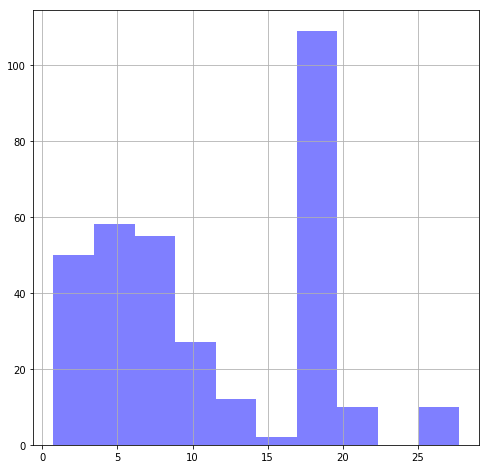

In [66]:
plt.figure(figsize=(8, 8))
plt.hist(df.indus, color='b', alpha=0.5)
plt.grid()
plt.show()

In [70]:
df_nox_indus_slice = df[(df.indus < 25) & (df.nox < 0.8)]

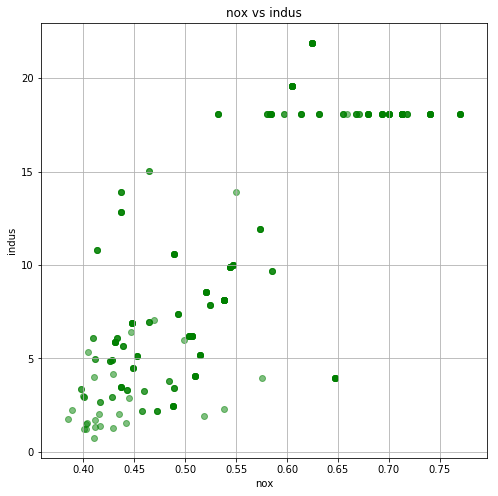

In [71]:
nox = df_nox_indus_slice.nox.values
indus = df_nox_indus_slice.indus.values

plt.figure(figsize=(8, 8))
plt.scatter(nox, indus, alpha=0.5, c='g')
plt.grid()
plt.xlabel("nox")
plt.ylabel("indus")
plt.title("nox vs indus")
plt.show()

(array([27., 57., 30., 49., 35., 51., 27., 32., 15., 10.]),
 array([-0.95451194, -0.87287208, -0.79123222, -0.70959235, -0.62795249,
        -0.54631262, -0.46467276, -0.38303289, -0.30139303, -0.21975317,
        -0.1381133 ]),
 <a list of 10 Patch objects>)

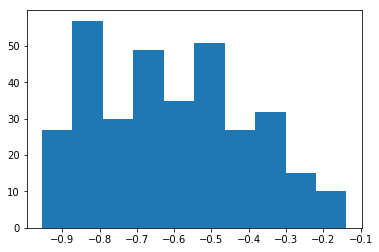

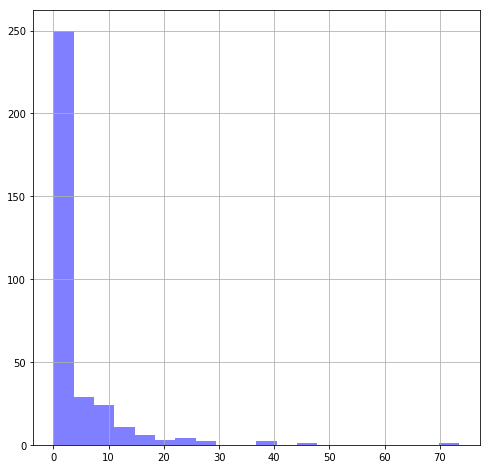

In [75]:
plt.figure(figsize=(8, 8))
plt.hist(df.crim, color='b', alpha=0.5, bins = 20)
plt.grid()
plt.show()

In [76]:
df.crim.describe()

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In [77]:
inner_quarters = np.percentile(df.crim.values, q=[25, 50, 75])

In [82]:
inner_quarters_crim_df = df[(df.crim >= 0.7896) & (df.crim <= 3.36822)]
inner_quarters_crim_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
11,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
14,22,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
15,23,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2


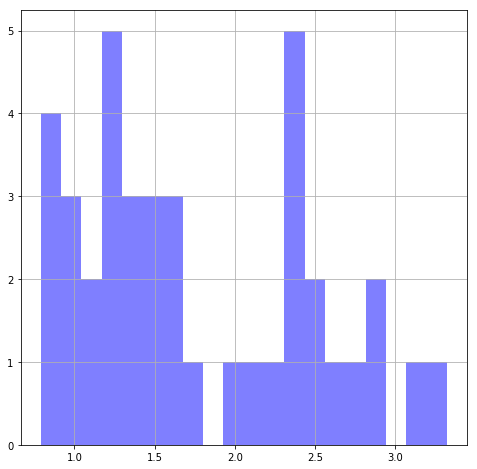

In [83]:
plt.figure(figsize=(8, 8))
plt.hist(inner_quarters_crim_df.crim, color='b', alpha=0.5, bins = 20)
plt.grid()
plt.show()

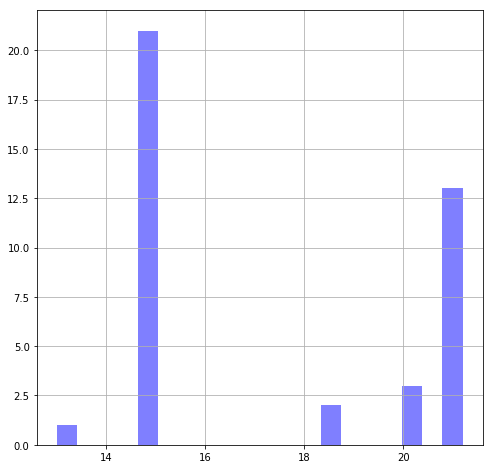

In [84]:
plt.figure(figsize=(8, 8))
plt.hist(inner_quarters_crim_df.ptratio, color='b', alpha=0.5, bins = 20)
plt.grid()
plt.show()

In [86]:
inner_quarters_crim_df.ptratio.value_counts()

14.7    21
21.0    10
20.2     3
21.2     3
18.4     2
13.0     1
Name: ptratio, dtype: int64

In [87]:
color_dict = {14.7: 'g', 21.0: 'b', 20.2: "r", 21.2: "k", 18.4: "purple", 13.0: "cyan"}

No handles with labels found to put in legend.


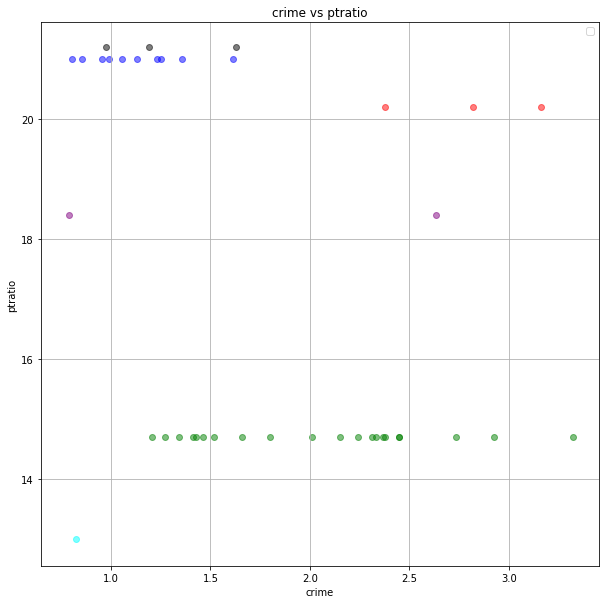

In [95]:
plt.figure(figsize=(10, 10))
for cr, pt in zip(inner_quarters_crim_df.crim, inner_quarters_crim_df.ptratio):
    plt.scatter(cr, pt, alpha=0.5, c = color_dict[pt])
plt.xlabel("crime")
plt.legend()
plt.grid()
plt.ylabel("ptratio")
plt.title("crime vs ptratio")
plt.show()


## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [90]:
ptratio_14 = df[df.ptratio == 14.7]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=14.7, right=14.7
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=14.7, top=14.7
  'bottom=%s, top=%s') % (bottom, top))


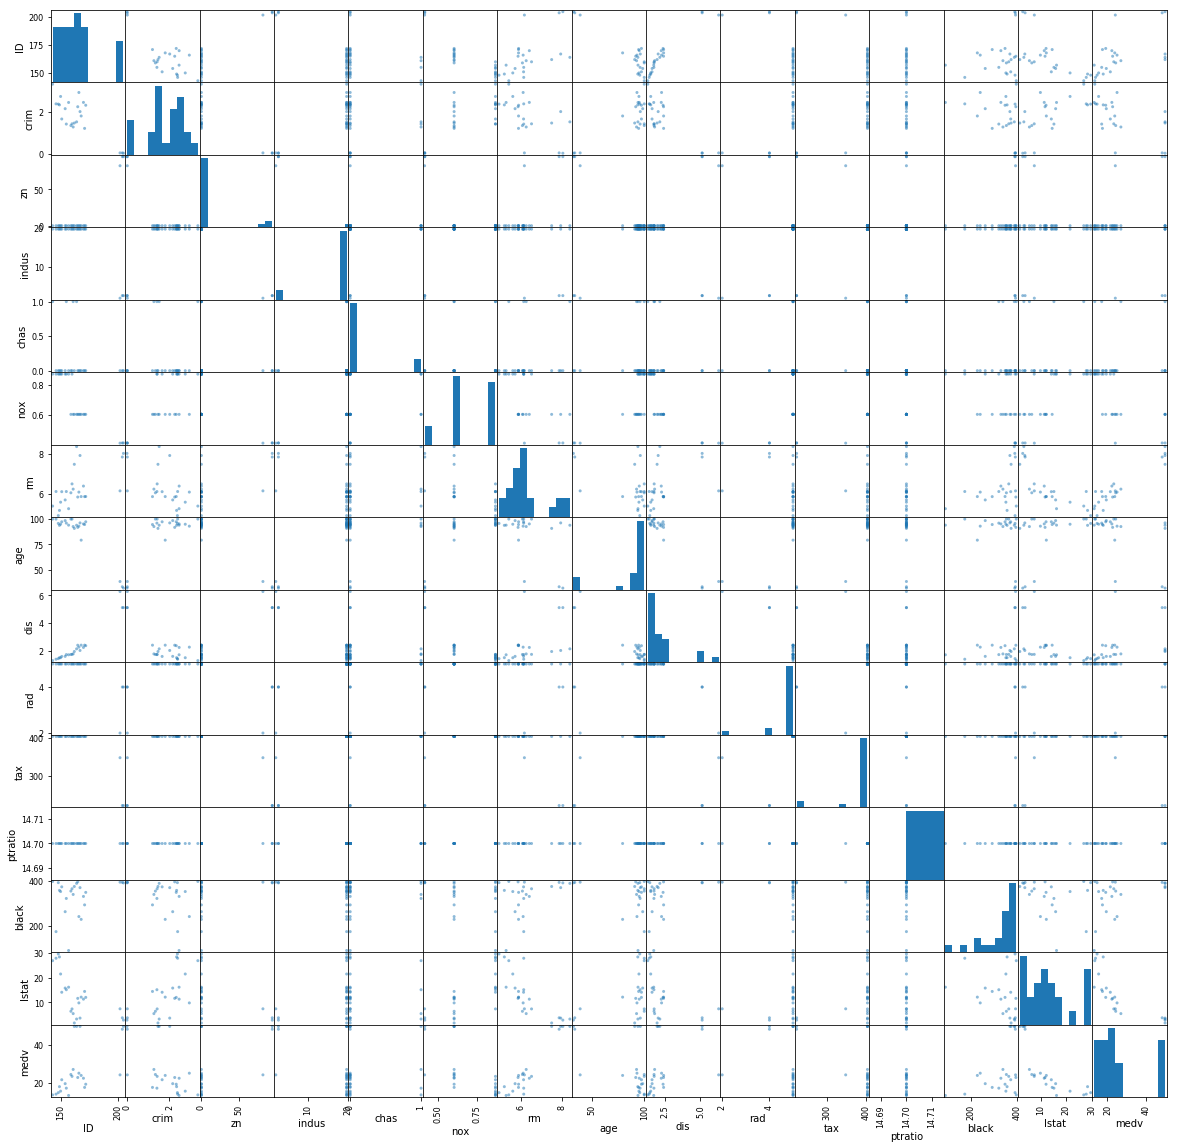

In [92]:
pd.scatter_matrix(ptratio_14, figsize=(20, 20))
plt.show()